In [5]:
#http://readiab.org/book/latest/3/1

'''From a bioinformatics perspective, studying biological diversity is centered around a few key pieces of information:

A table of the frequencies of certain biological features (e.g., species or OTUs) on a per sample basis.
Sample metadata describing exactly what each of the samples is, as well as any relevant technical information.
Feature metadata describing each of the features. This can be taxonomic information, for example, but we'll come back to this when we discuss features in more detail (this will be completed as part of #105).
Optionally, information on the relationships between the biological features, typically in the form of a phylogenetic tree where tips in the tree correspond to OTUs in the table.'''
import numpy as np
import pandas as pd
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
fig = plt.figure(figsize=(10, 10))

import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
from skbio.diversity import alpha_diversity, beta_diversity
import skbio

df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')
newdf = pd.read_csv('/home/erika/Desktop/likeliest_match_abspres.csv')
averagetable = newdf.groupby(['Slope', 'Depth'])['n_peaks']
averagetable2= averagetable.agg(['mean', 'std'])
averagetable= averagetable.agg(['mean'])

print(averagetable2)
averagetable.style \
  .format('{:.2f}') \
  .bar(align='left', color=['#0c750b', '#266352']) \
  .set_caption('masses') \
  .set_properties(padding="15px", border='3px solid black', width='200px')



                  mean          std
Slope Depth                        
1S    05      4977.000   477.032494
      15      5710.125  1380.641615
      30      5187.625   311.637123
      60      5002.125  1065.120441
2B    05      5580.000  1095.305802
      15      5775.875   713.916249
      30      5153.250   570.800878
      60      4675.500  1521.545924
3F    05      5943.000   810.138671
      15      5552.750  1075.477004
      30      4423.125   408.120934
      60      5234.625   765.969402
4T    05      5002.000   545.508413
      15      5346.625  1275.519159
      30      4963.625  1171.944408
      60      4099.875  1910.148568
5ST   Stream  5388.200   969.993333


<Figure size 720x720 with 0 Axes>

In [12]:
'''
Data can be averaged based on the sample but also based on the catchment replicates in order to create a 3D-heatmap for all the objects. 
https://stackoverflow.com/questions/40853556/3d-discrete-heatmap-in-matplotlib

'''
df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')


'''
Organize the dataframe such that it is filterable by Position and Depth in the heatmap.
'''
Samples = df.copy()
Samples.fillna(0, inplace=True)
SamplesT = Samples.T.reset_index()
SamplesT.rename(columns=SamplesT.iloc[0], inplace=True)
SamplesT.drop(SamplesT.index[0], inplace=True)
SamplesT= SamplesT.rename(columns={'formula_isotopefree': 'SiteCode1'})
SamplesT['SiteCode'] = SamplesT['SiteCode1'].str.split('.').str[0]
new= SamplesT['SiteCode'].str.split('(\d+)([A-Za-z]+)', n = 3, expand = True) 
new['SiteName'] = new[0]+ new[1] 
new['SiteCode'] = new['SiteName'] + new[2] + new[3]
new = new.rename(columns={2: 'Position', 3: 'Depth'})
result = pd.concat([new, SamplesT], axis=1)
result['Depth'] = result['Depth'].apply(lambda x: 'Stream' if len(x) <2 else x)
#result.loc[mask, 'Depth'] = result.loc[mask, 'Depth'].str.replace('s$', 'Stream')
result.drop(result.columns[0:2],axis=1,inplace=True)
result.drop(result.columns[3],axis=1,inplace=True)
dfn = result.convert_dtypes()
dfn['Position']= dfn['Position'].replace({"S": "1S", "B": "2B", "F": "3F", "T": '4T', 'ST':'5ST' })
dfn["PosDepth"] = dfn["Position"] +  dfn["Depth"]
print (dfn)

    Position   Depth SiteName SiteCode1   C4H6O3  C5H10O2  C2H4N2OS  C3H9N2P  \
1         1S      05       H1     H1S05  5995105        0         0        0   
2         1S      05       H1   H1S05.1  5401922  2413888         0        0   
3         1S      15       H1     H1S15  7590360        0         0        0   
4         1S      15       H1   H1S15.1  7944181        0         0        0   
5         1S      30       H1     H1S30  5804388        0         0  2253172   
..       ...     ...      ...       ...      ...      ...       ...      ...   
132       4T      30       C2   C2T30.1  8471598  4628973         0        0   
133       4T      60       C2     C2T60        0        0         0        0   
134       4T      60       C2   C2T60.1  2818040        0         0        0   
135      5ST  Stream       C2      C2ST  6735338        0         0        0   
136      5ST  Stream       C2    C2ST.1  7327984        0         0        0   

      C6H3NO    C7H6O  ...  C44H56O23  

<class 'skbio.stats.distance._base.DistanceMatrix'>
<class 'skbio.stats.distance._base.DistanceMatrix'>


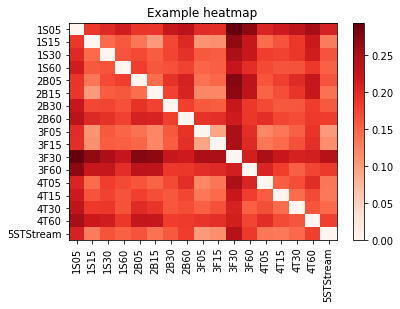

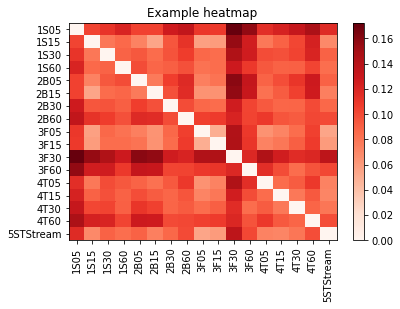

In [14]:
slopegroup = dfn.groupby('PosDepth').mean()
SlopeID = list(slopegroup.index)
slopegroup.reset_index(drop=True, inplace=True)
slopegroup = slopegroup.astype(bool).astype(int)
slopegroup= slopegroup.to_numpy()

#scale results 
bcm1= beta_diversity('jaccard', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

bcm1= beta_diversity('braycurtis', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

<class 'skbio.stats.distance._base.DistanceMatrix'>
<class 'skbio.stats.distance._base.DistanceMatrix'>


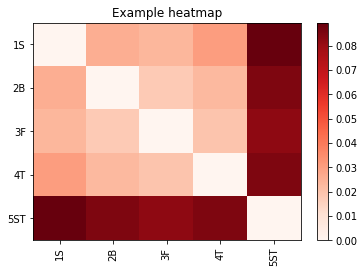

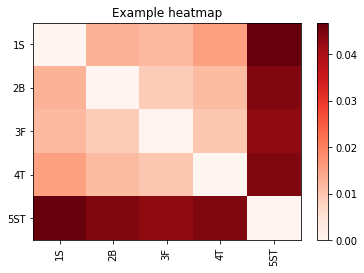

In [13]:
#dichotomous presence/absence
#https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/
slopegroup = dfn.groupby('Position').mean()
dgroup = dfn.groupby('Depth').mean()
SlopeID = list(slopegroup.index)
depthID = list(dgroup.index)

slopegroup.reset_index(drop=True, inplace=True)
slopegroup = slopegroup.astype(bool).astype(int)
slopegroup= slopegroup.to_numpy()
dgroup.reset_index(drop=True, inplace=True)
dgroup = dgroup.astype(bool).astype(int)
dgroup= dgroup.to_numpy()

#scale results 
bcm1= beta_diversity('jaccard', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

bcm1= beta_diversity('braycurtis', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')


<class 'skbio.stats.distance._base.DistanceMatrix'>


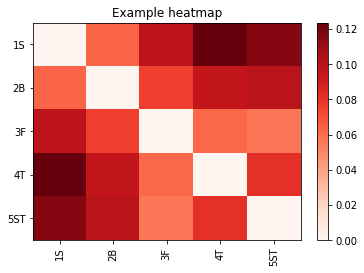

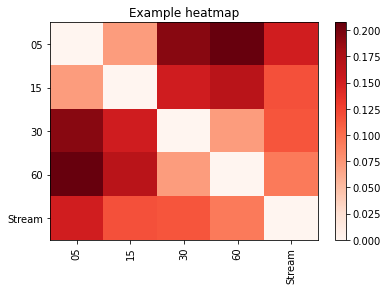

In [199]:
'''
Should it be the sum or the average of the intensities of the various molecules? 
'''

dfn['Position']= dfn['Position'].replace({"S": "1S", "B": "2B", "F": "3F", "T": '4T', 'ST':'5ST' })
slopegroup = dfn.groupby('Position').mean()
dgroup = dfn.groupby('Depth').mean()
SlopeID = list(slopegroup.index)
depthID = list(dgroup.index)

slopegroup.reset_index(drop=True, inplace=True)
slopegroup= slopegroup.to_numpy()
dgroup.reset_index(drop=True, inplace=True)
dgroup= dgroup.to_numpy()

#scale results 
bcm1= beta_diversity('braycurtis', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

bcm= beta_diversity('braycurtis', dgroup, depthID)
fig = bcm.plot(cmap='Reds', title='Example heatmap')


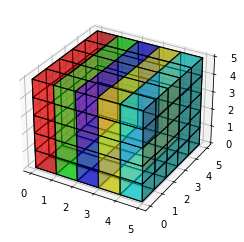

<Figure size 432x288 with 0 Axes>

In [200]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # NOQA

spatial_axes = [5, 5, 5]
filled = np.ones(spatial_axes, dtype=np.bool)

colors = np.empty(spatial_axes + [4], dtype=np.float32)
alpha = .5
colors[0] = [1, 0, 0, alpha]
colors[1] = [0, 1, 0, alpha]
colors[2] = [0, 0, 1, alpha]
colors[3] = [1, 1, 0, alpha]
colors[4] = [0, 1, 1, alpha]

# set all internal colors to black with alpha=1
colors[1:-1, 1:-1, 1:-1, 0:3] = 0
colors[1:-1, 1:-1, 1:-1, 3] = 1

fig = plt.figure()

ax = fig.add_subplot('111', projection='3d')
ax.voxels(filled, facecolors=colors, edgecolors='k')

fig = plt.figure()
#ax = fig.add_subplot('111', projection='3d')
#filled[-1] = False
#ax.voxels(filled, facecolors=colors, edgecolors='k')

In [201]:
#http://scikit-bio.org/docs/latest/generated/skbio.stats.distance.bioenv.html#skbio.stats.distance.bioenv

'\nPlot two is a histogram of the number of times a specific isotope confirmed molecule appears in the sample set. The distribution is super weird. \nThere are very few unique molecules (some that are are shared rather narrowly and many that are universal)\n'

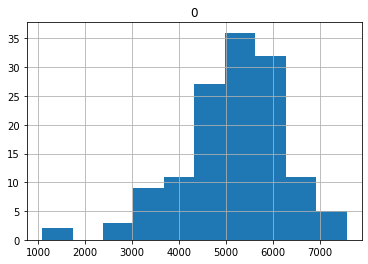

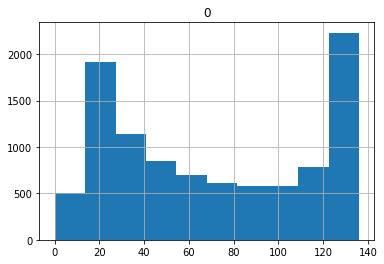

In [202]:

'''
This is again the number of molecules that exist within the sample set (including replicates) not necessarily excluding all of the contaminants. Most of these plots are alphas diversity metrics with beta dibersity following later. 
the docs for this version are here:
http://scikit-bio.org/docs/latest/diversity.html
'''

df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')

Samp = df.copy()
Samp.fillna(0, inplace=True)
Samp = Samp.set_index('formula_isotopefree')

SampleID = list(Samp.columns)
SampT = Samp.T
data2 = SampT.values
OTUID= list(SampT.columns)
dataOTU= Samp.values

adiv_obs_otus = alpha_diversity('observed_otus', data2, SampleID)
adiv_obs_otus_OTU = alpha_diversity('observed_otus', dataOTU, OTUID)

df1 = pd.DataFrame(adiv_obs_otus)
dfOTU = pd.DataFrame(adiv_obs_otus_OTU)
df1.hist()
dfOTU.hist()

'''
Plot two is a histogram of the number of times a specific isotope confirmed molecule appears in the sample set. The distribution is super weird. 
There are very few unique molecules (some that are are shared rather narrowly and many that are universal)
'''


Populating the interactive namespace from numpy and matplotlib


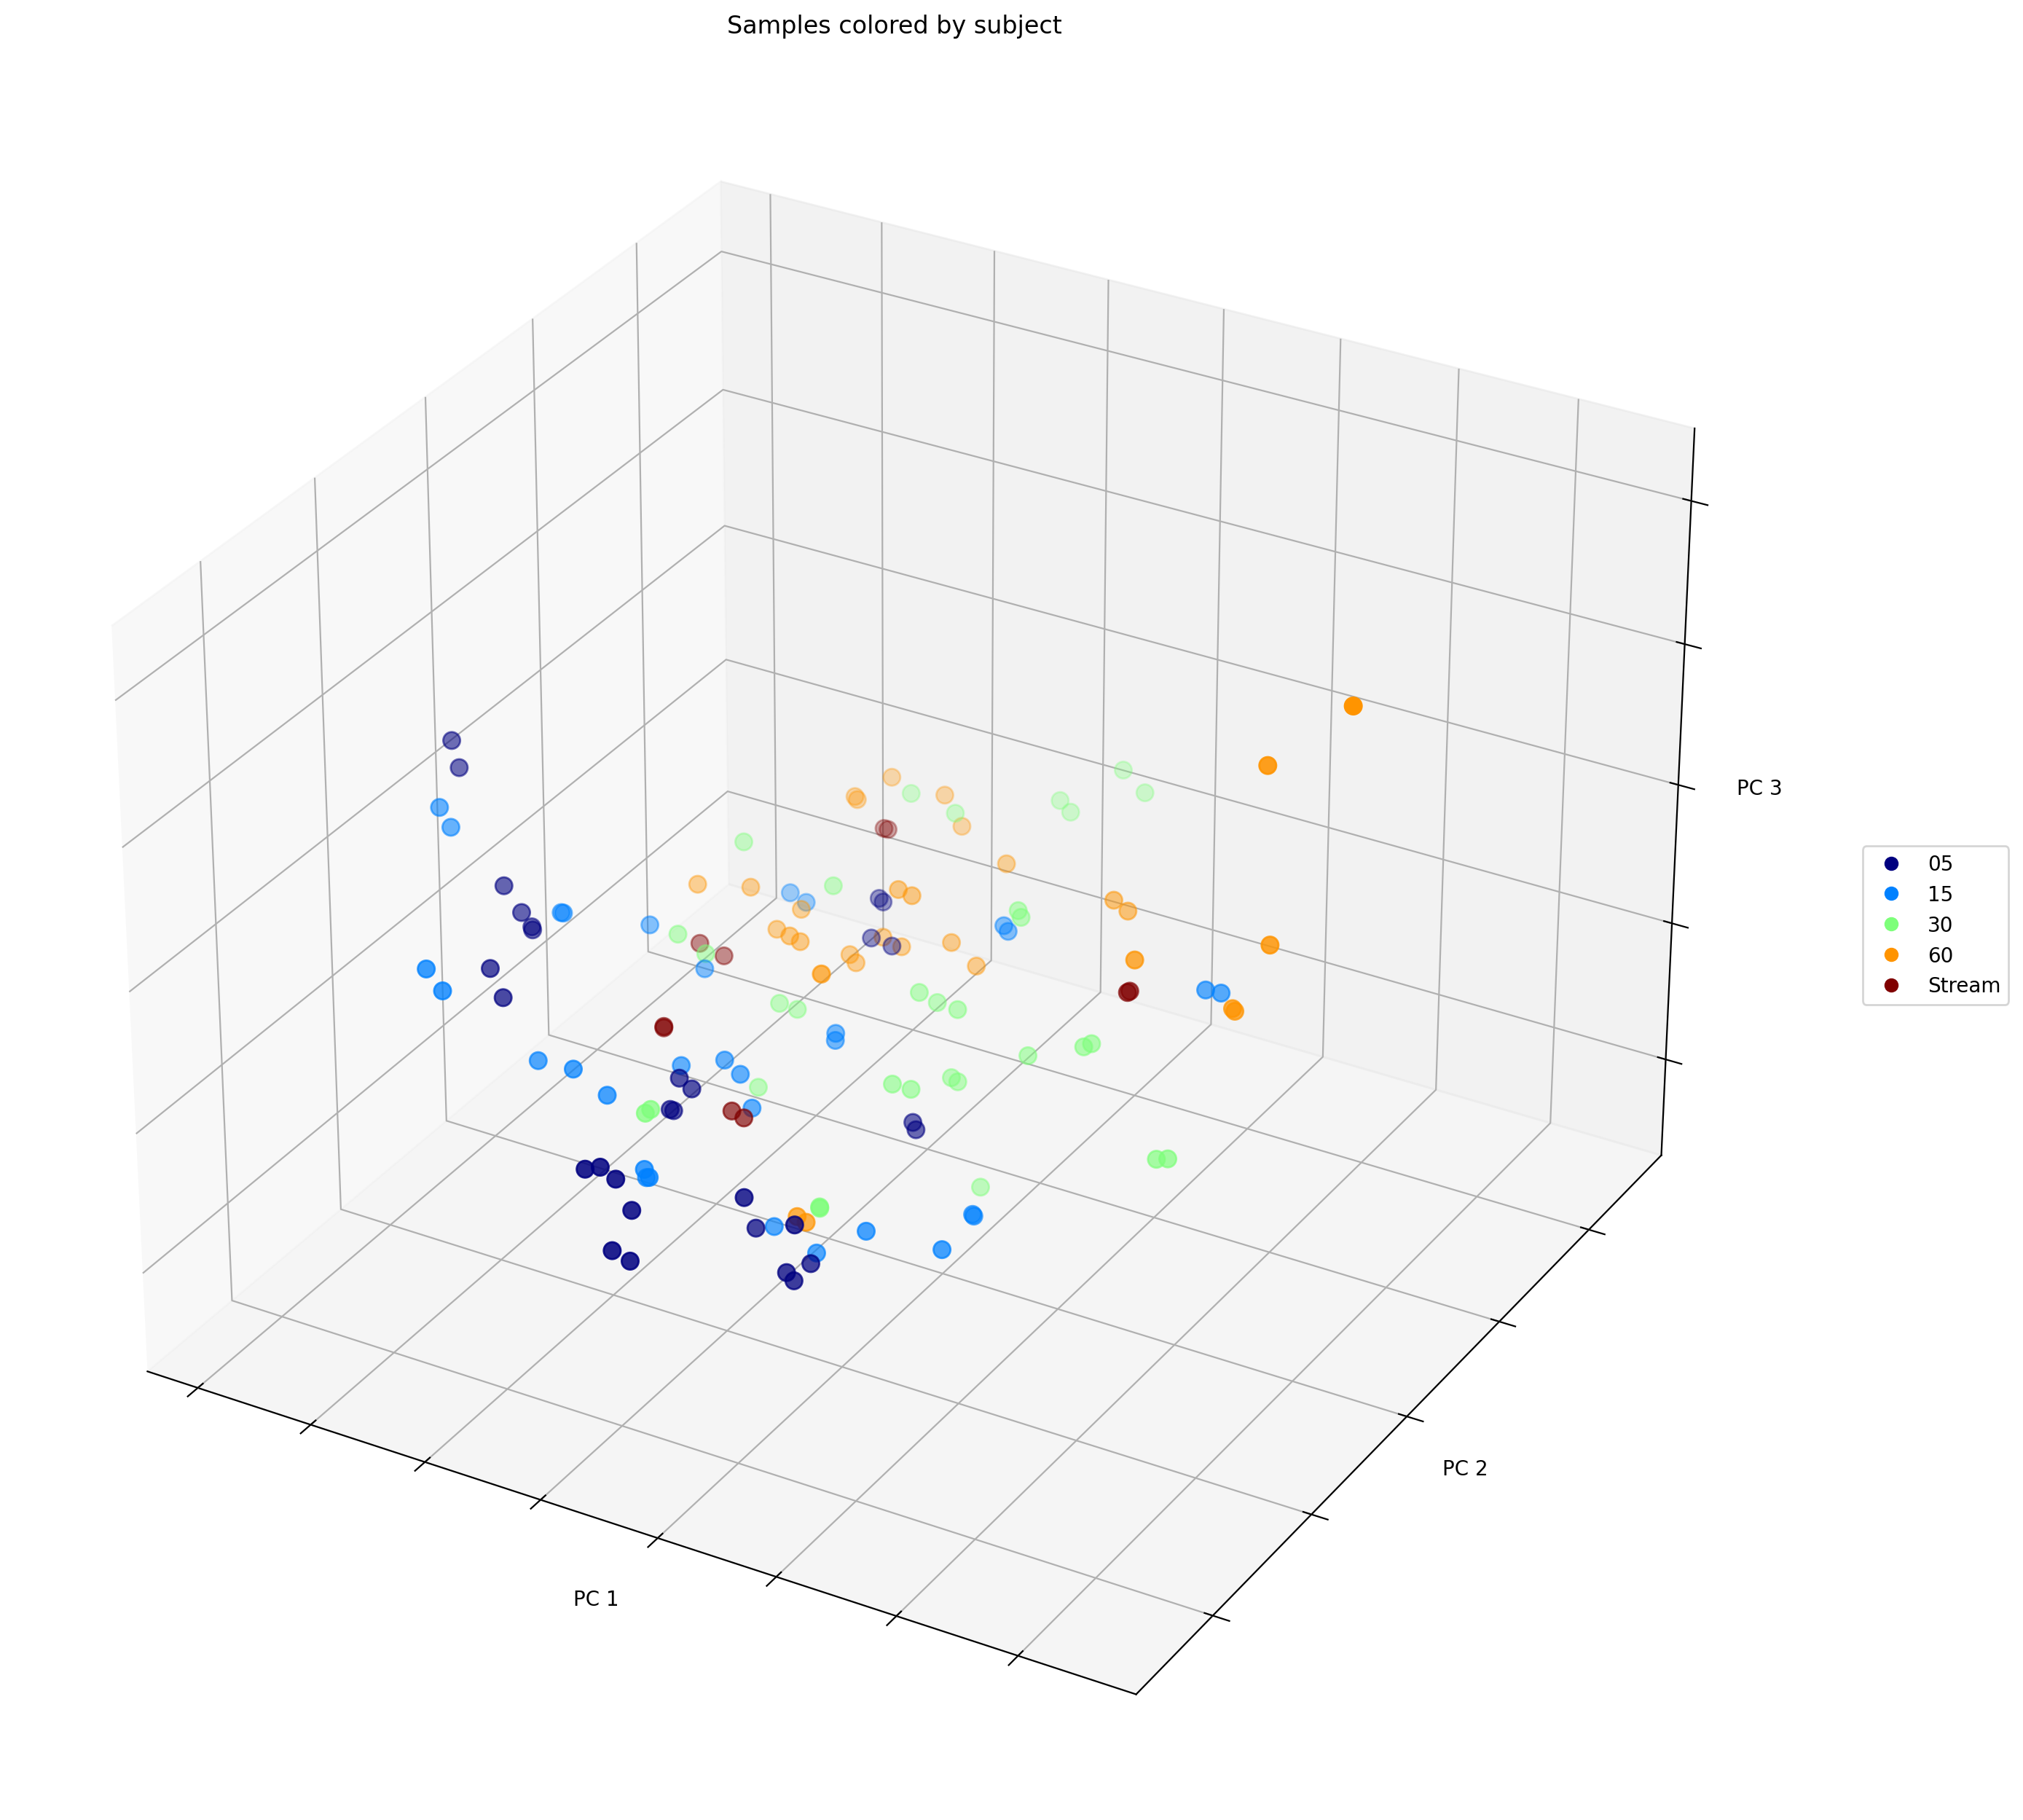

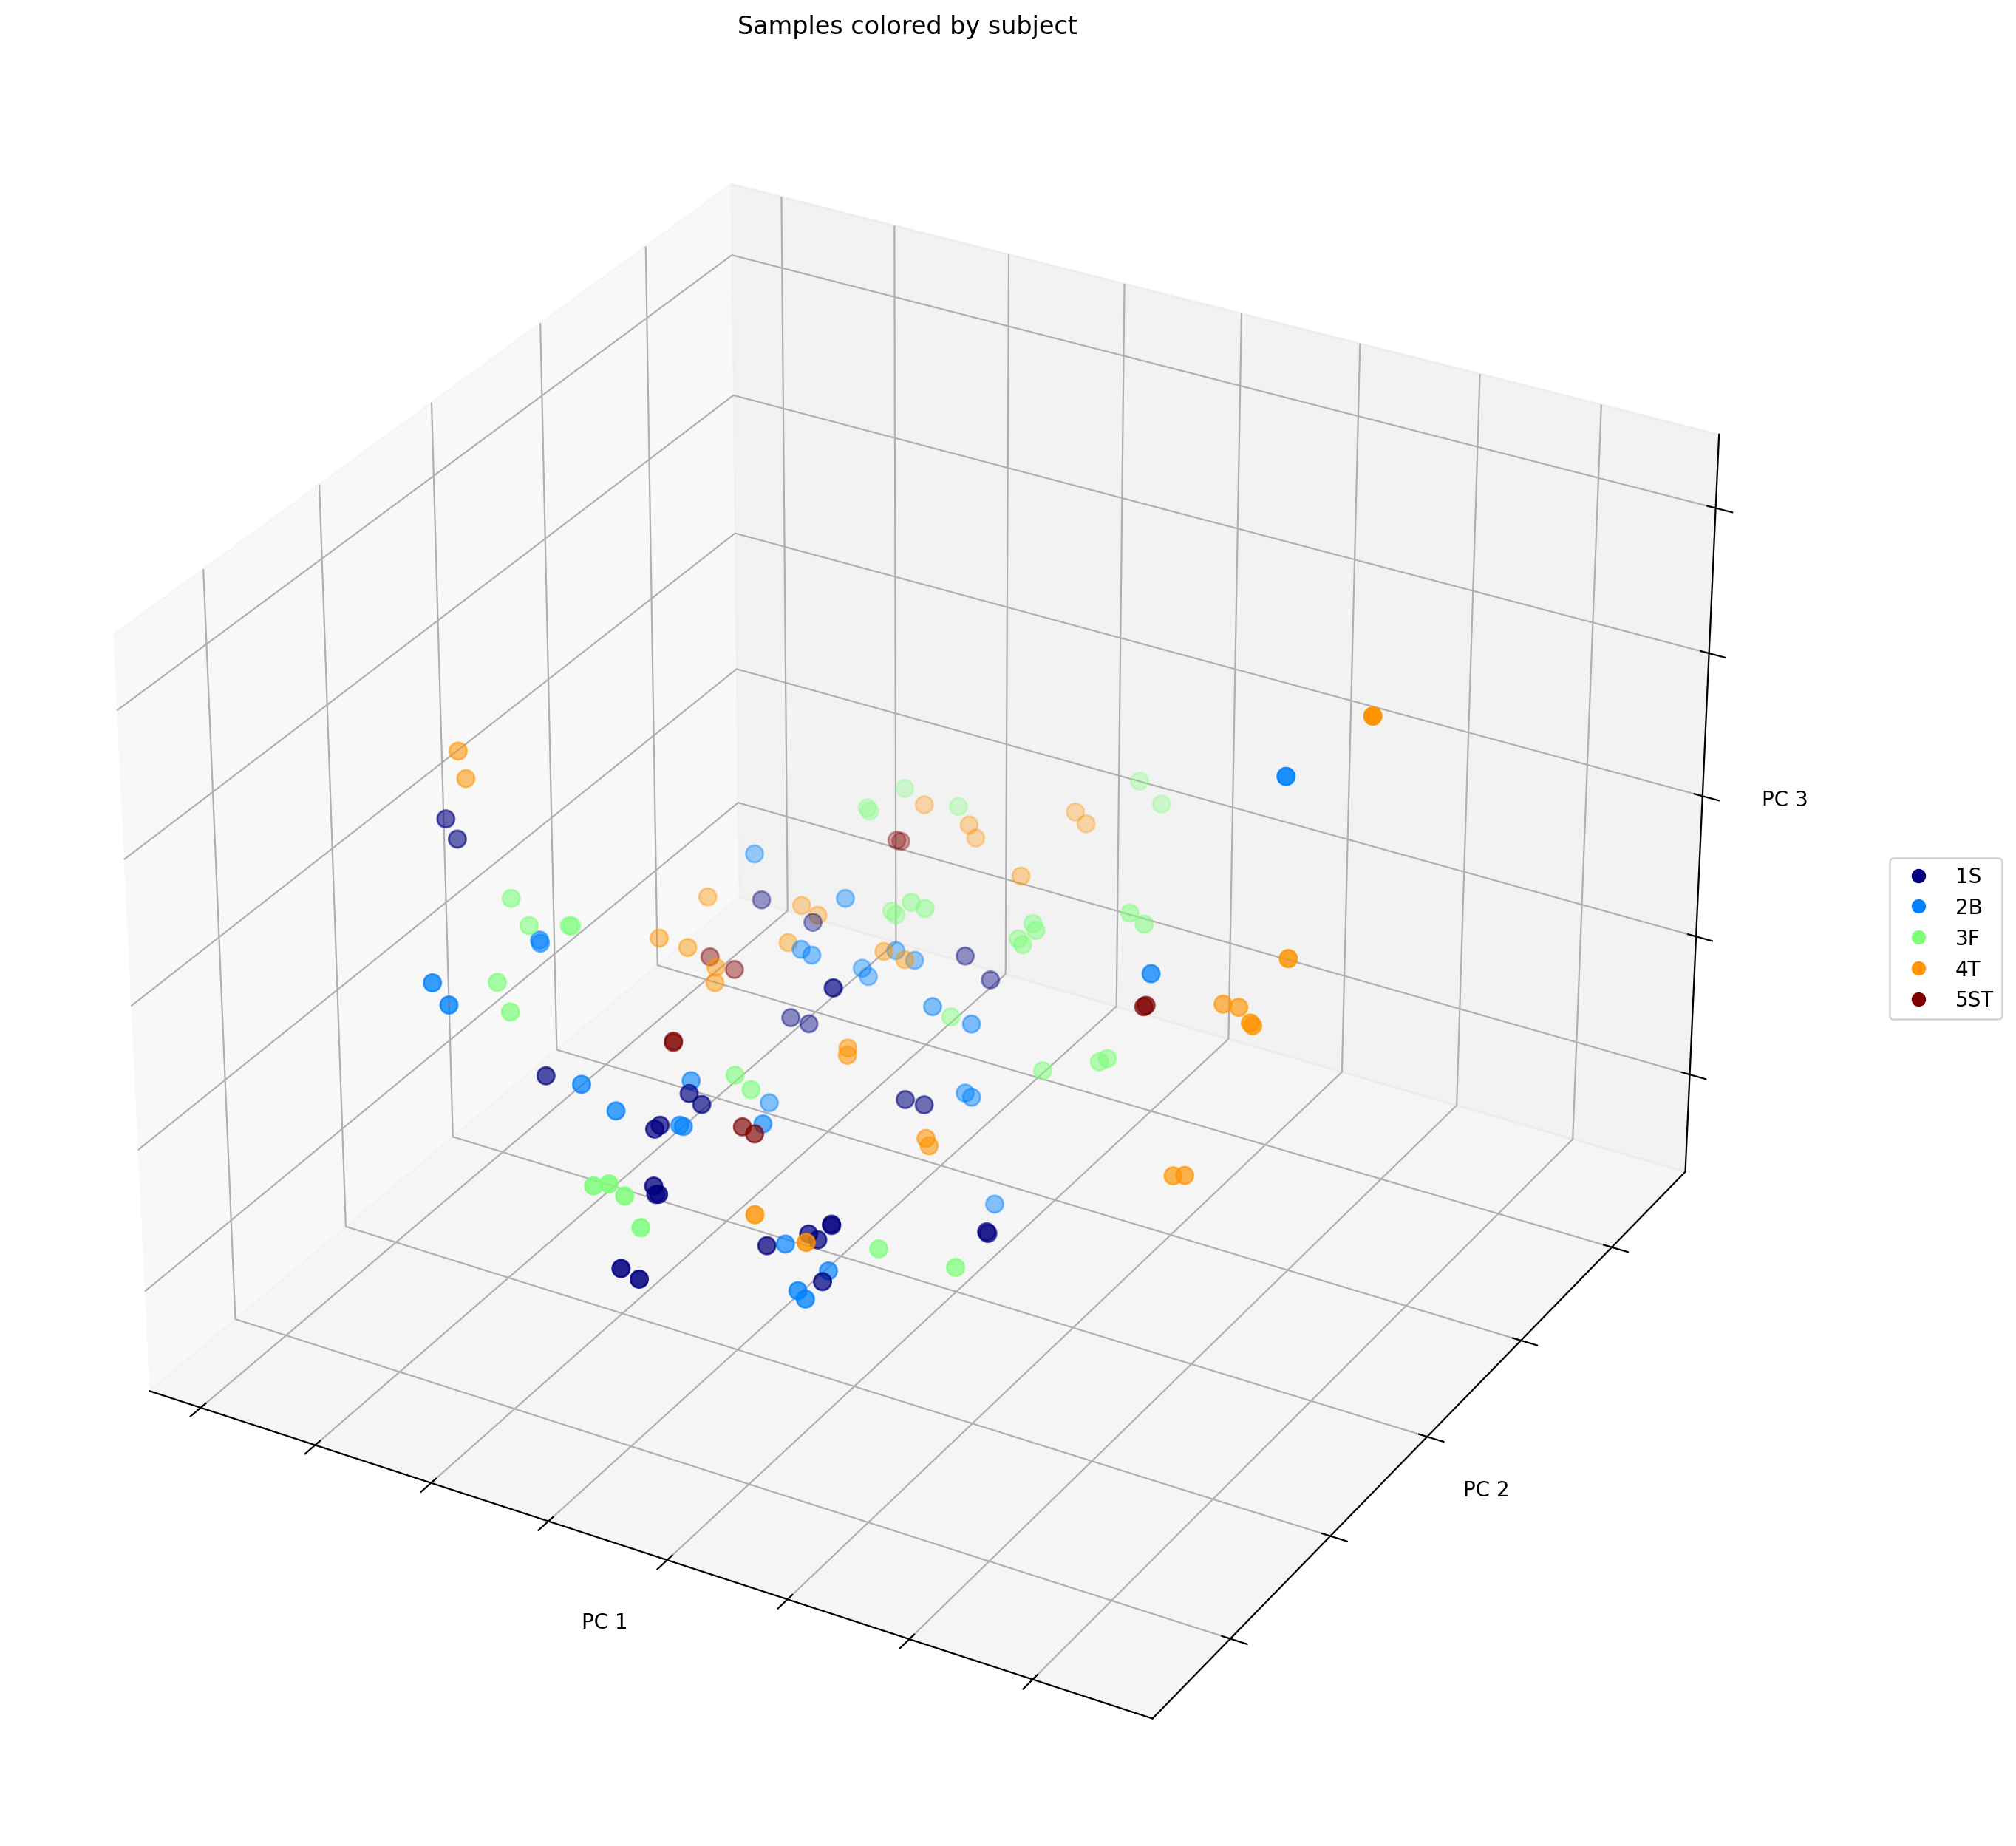

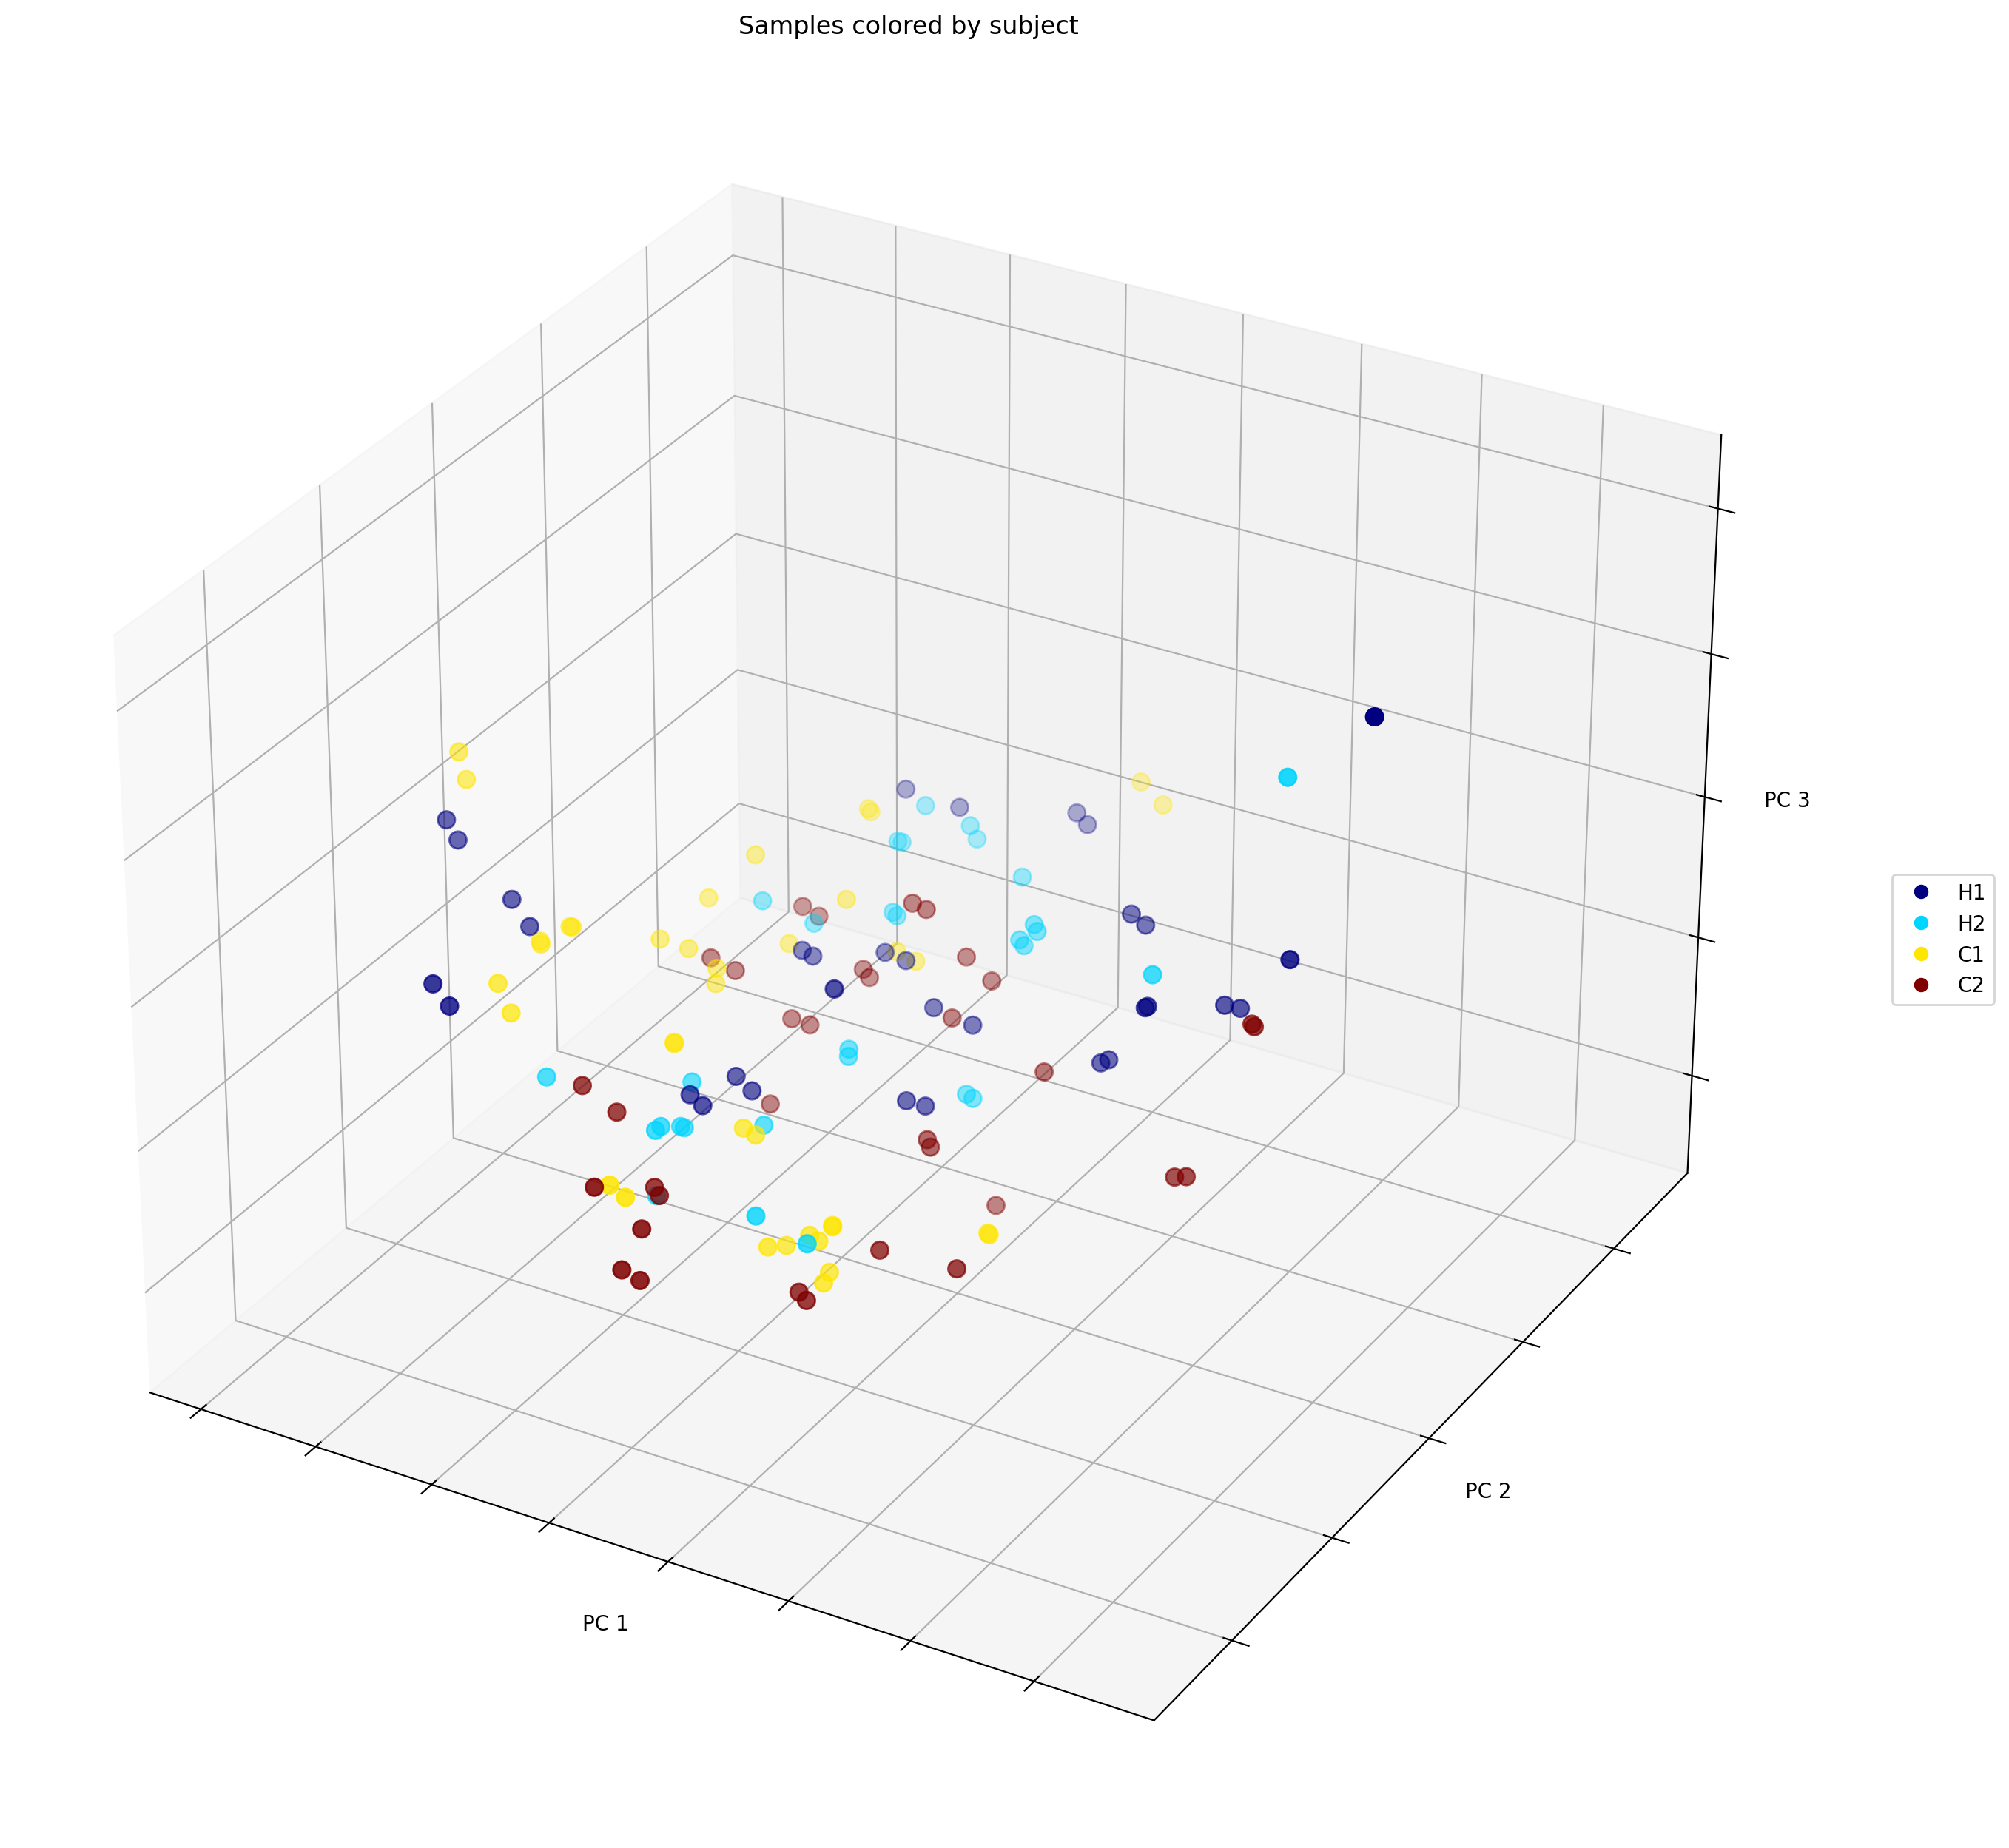

In [205]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 16)
pylab.rcParams['figure.dpi'] = 200


#scale results 

bcm= beta_diversity('braycurtis', data2, SampleID)
bcm.svg
pdbcm= bcm.to_data_frame()
from skbio.stats.ordination import pcoa
wu_pc = pcoa(bcm)
sample_md = pd.read_csv('/home/erika/Desktop/likeliest_match_abspres.csv')
sample_md.set_index('index', inplace=True)
sample_md.drop(sample_md.columns[1],axis=1,inplace=True)

fig= wu_pc.plot(sample_md, 'Depth',
                 axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by subject', cmap='jet', s=70)
#https://stackoverflow.com/questions/53217771/jupyter-making-3d-matplotlib-graphs-extremely-small

fig= wu_pc.plot(sample_md, 'Slope',
                 axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by subject', cmap='jet', s=70)


fig= wu_pc.plot(sample_md, 'Site',
                 axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by subject', cmap='jet', s=70)

plt.show()

In [204]:
skbio.stats.distance.anosim(bcm, sample_md, column='Depth', permutations=999)
skbio.stats.distance.permanova(bcm, sample_md, column='Depth', permutations=999)
skbio.stats.distance.permdisp(bcm, sample_md, column='Depth', test='median', permutations=999)

AssertionError: 

In [182]:
import networkx as nx
bcm2 = bcm.data
G = nx.from_numpy_matrix(bcm2)
nx.draw(G)
labels = SampleID
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))

nx.draw(G, with_labels=True)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

In [ ]:
'in theory, it is also possible that the 54 fragmented formulae share a common set of source-material in the different environments, e.g., specific biomolecules from terrestrial organic matter input. However, we chose the compounds across the entire spectrum of DOM compounds and not from a subgroup with specific molecular compoisition and is hence unlikely that all fragmented compounds share the same precursor. It is more likely that univeral biosynthetic pathways exist across the range of tested environments that may ultimately lead to the formation of similar carbon skeletons with high degrees of carboxyl and hydroxyl substitutions. Further, the hypothesized diversification is in agreement with other concepts on DOM diversity. The iconic River Continuum Concept,for example, states that DOM diversity decerases from headwater streams to the river mouth with only the refractory compounds being leftover after rapid degradation of labile compounds. Creed et al further developed a new model to explain the DOM variability observed in river systems and they hypothesize an increasing chemostasis of DOM, meaning a higher spatial and temporal heterogeneity with increasing stream order. 
'
'They introduced two levels of diversity: First, the diversity between ecosystems, here termed molecular B-diversity in analogy to ecological concepts. This is the level of diversity that the River Continuum concept refers to and which is also resembled in the vbiew of the river as a chemostat. The diversity (or richness) that is inherent of a specific ecosystem is termed molecular a-diversity. Casecades of degradation processes and mixing in aquatic environments likely increase molecualar a-diversity through the stepwise formation of a complex mixture with a high number of isomeres between each molecular formula. Degradation processes could be abiotic (photo- or thermal degradation) or biotic, and particularly microbial reworking is an important process in this context. Marine microbes remove DOM, but they also produce new DOM. The DOM produced is more diverse than the initial substrates and thus they contribute to molecular diversification. ** Part of the source-specific DOM component, however, seems to be resistant towards photo- and year-long biodegradation, and long time-scales are necessary for the observed prevalance of the universal DOM component in the deep sea. Previous studies were stating the same hypothesis, that common process may for a large pool of similar DOM structure across different enviornments. 